In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('dane/covid_ms_gold.csv')
df_poland = df.query('country_name=="Poland"')
display(df_poland)

research_columns = ['new_confirmed', 'new_deceased', 'minimum_temperature_celsius', 'new_persons_vaccinated', 'new_tested']

,location_key,country_code,country_name,longitude,latitude,date,cumulative_confirmed,new_confirmed,cumulative_tested,new_tested,...,Low_Gold,Close_Gold,Adj Close_Gold,Volume_Gold,High_MS,Low_MS,Open_MS,Close_MS,Volume_MS,Adj Close_MS
82253,PL,POL,Poland,19.0,52.0,2020-01-01,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82254,PL,POL,Poland,19.0,52.0,2020-01-02,0.0,0.0,NaN,NaN,...,1518.0,1524.5,1524.5,214.0,160.729996,158.330002,158.779999,160.619995,22622100.0,156.591980
82255,PL,POL,Poland,19.0,52.0,2020-01-03,0.0,0.0,NaN,NaN,...,1530.1,1549.2,1549.2,107.0,159.949997,158.059998,158.320007,158.619995,21116200.0,154.642151
82256,PL,POL,Poland,19.0,52.0,2020-01-04,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82257,PL,POL,Poland,19.0,52.0,2020-01-05,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83239,PL,POL,Poland,19.0,52.0,2022-09-13,6233117.0,5858.0,NaN,16802.0,...,1697.3,1705.0,1705.0,432.0,NaN,NaN,NaN,NaN,NaN,NaN
83240,PL,POL,Poland,19.0,52.0,2022-09-14,NaN,NaN,NaN,17029.0,...,1696.5,1696.5,1696.5,532.0,NaN,NaN,NaN,NaN,NaN,NaN
83241,PL,POL,Poland,19.0,52.0,2022-09-15,NaN,NaN,NaN,NaN,...,1662.3,1665.4,1665.4,1125.0,NaN,NaN,NaN,NaN,NaN,NaN
83242,PL,POL,Poland,19.0,52.0,2022-09-16,NaN,NaN,NaN,NaN,...,1651.7,1671.7,1671.7,464.0,NaN,NaN,NaN,NaN,NaN,NaN


## Zdecydowaliśmy się wyizolować dane jedynie dla Polski, ponieważ dane z kilku krajów zaburzałyby wizualizacje i utrudniały wnioski, przez powtarzające się daty i skrajnie różne wyniki, które najpierw wymagałyby jakiegoś rodzaju normalizacji 

### Jako dodatkowe kolumny wybraliśmy new_tested (liczbę nowych testów na coivd_19), ponieważ wyjątkowo dla Polski uzupełnienie tych danych jest na zadowalającym poziomie (ok. 60%), drugą kolumną jest minimum_temperature_celsius ponieważ wpływ jaki temperatura miała na pandemię w wypadku wyizolowania jednego kraju powinien być bardziej widoczny (gdzie w correlation matrix dane z różnych państw wpływały na siebię w taki sposób, że korelacja z danych pandemicznych z temperaturą była niewielka)

# Część 1:

Analiza zmian zjawisk w czasie porządkuje informacje i pozwala na wyciągnięcie bardziej szczegółowych wniosków, np. trendów ze składowymi okresowymi.

Trend to tendencja rozwojowa, która wskazuje ogólny kierunek rozwoju zjawiska. Rozwój zjawiska rozumiany jest jako systematyczne zmiany, jakim podlega to zjawisko. Rozróżniany jest m.in. trend liniowy i nieliniowy.

Składowe okresowe to regularne odchylenia od trendu. Wahania cykliczne charakteryzują się długookresowymi, rytmicznymi odchyleniami. Wahania sezonowe są krótkookresowe i odzwierciedlają wpływ zachowań wynikający z kalendarza. 

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla: istotne.

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. 2 innych różnych informacji, które uznasz za istotne.

In [3]:
window_df = pd.DataFrame(df_poland['date'])
window_size = 7

window_df['new_confirmed_avg'] = df_poland['new_confirmed'].rolling(window=window_size).mean()
window_df['new_deceased_avg'] = df_poland['new_deceased'].rolling(window=window_size).mean()
window_df['new_persons_vaccinated_avg'] = df_poland['new_persons_vaccinated'].rolling(window=window_size).mean()
window_df['new_tested_avg'] = df_poland['new_tested'].rolling(window=window_size).mean()
window_df['minimum_temperature_celsius_avg'] = df_poland['minimum_temperature_celsius'].rolling(window=window_size).mean()

window_df['new_confirmed_std'] = df_poland['new_confirmed'].rolling(window=window_size).std()
window_df['new_deceased_std'] = df_poland['new_deceased'].rolling(window=window_size).std()
window_df['new_persons_vaccinated_std'] = df_poland['new_persons_vaccinated'].rolling(window=window_size).std()
window_df['new_tested_std'] = df_poland['new_tested'].rolling(window=window_size).std()
window_df['minimum_temperature_celsius_std'] = df_poland['minimum_temperature_celsius'].rolling(window=window_size).std()

display(window_df)

,date,new_confirmed_avg,new_deceased_avg,new_persons_vaccinated_avg,new_tested_avg,minimum_temperature_celsius_avg,new_confirmed_std,new_deceased_std,new_persons_vaccinated_std,new_tested_std,minimum_temperature_celsius_std
82253,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82254,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82255,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82256,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82257,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83239,2022-09-13,4383.0,15.000000,NaN,11926.285714,9.423016,2755.807686,11.195237,NaN,6428.569818,2.80971
83240,2022-09-14,NaN,13.857143,NaN,12539.857143,NaN,NaN,10.383137,NaN,6717.006536,NaN
83241,2022-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83242,2022-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


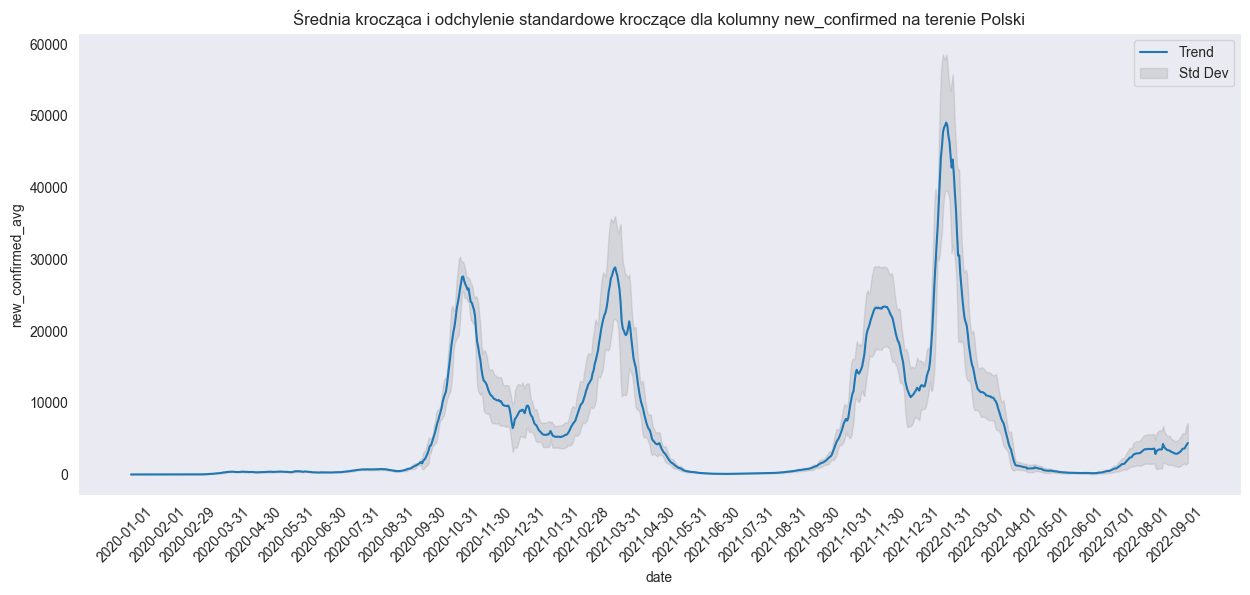

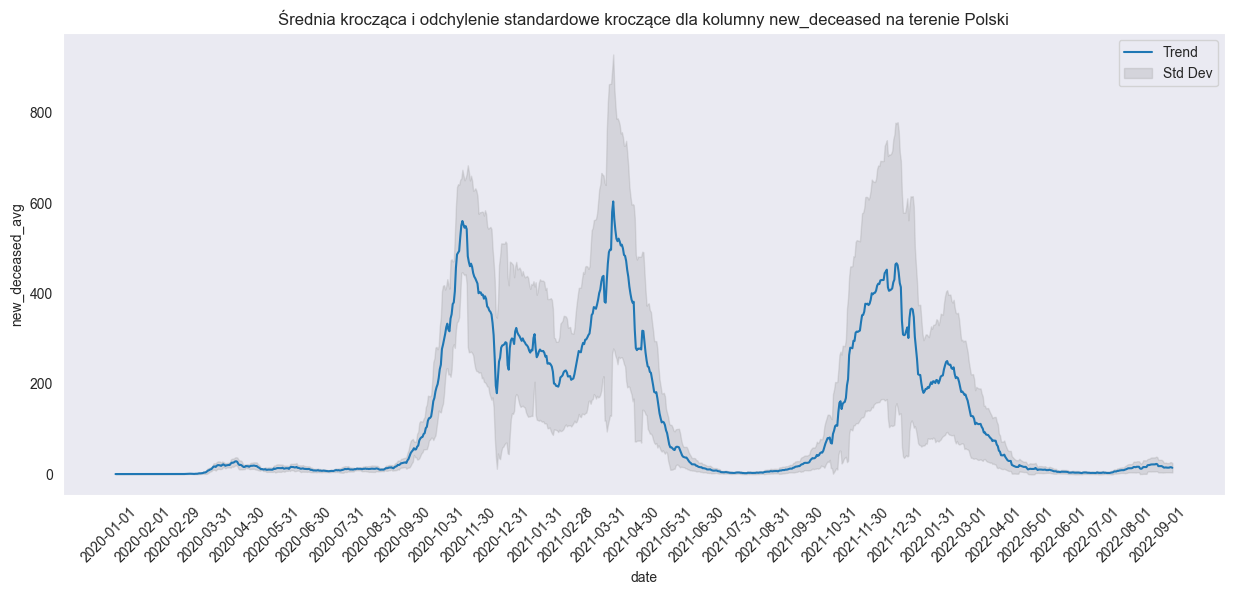

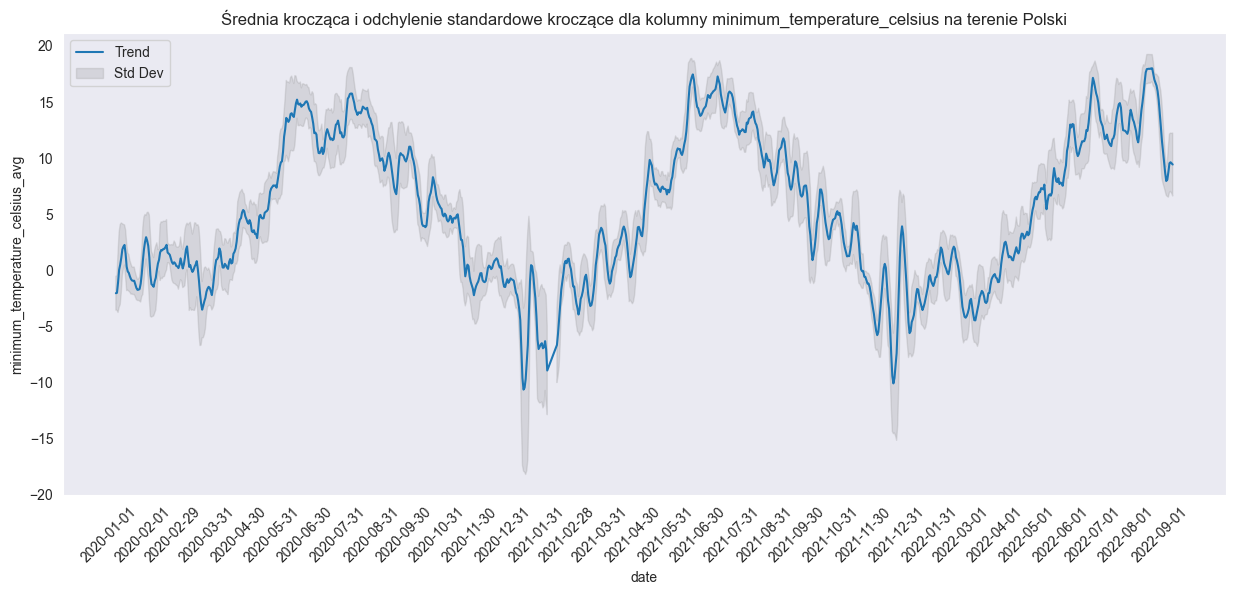

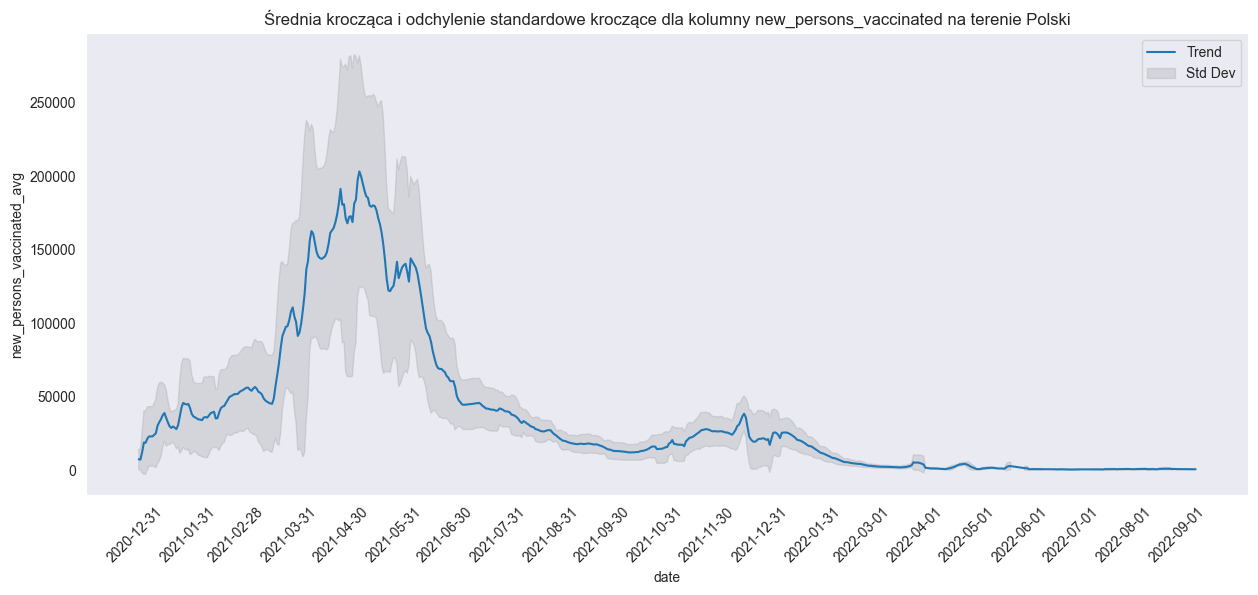

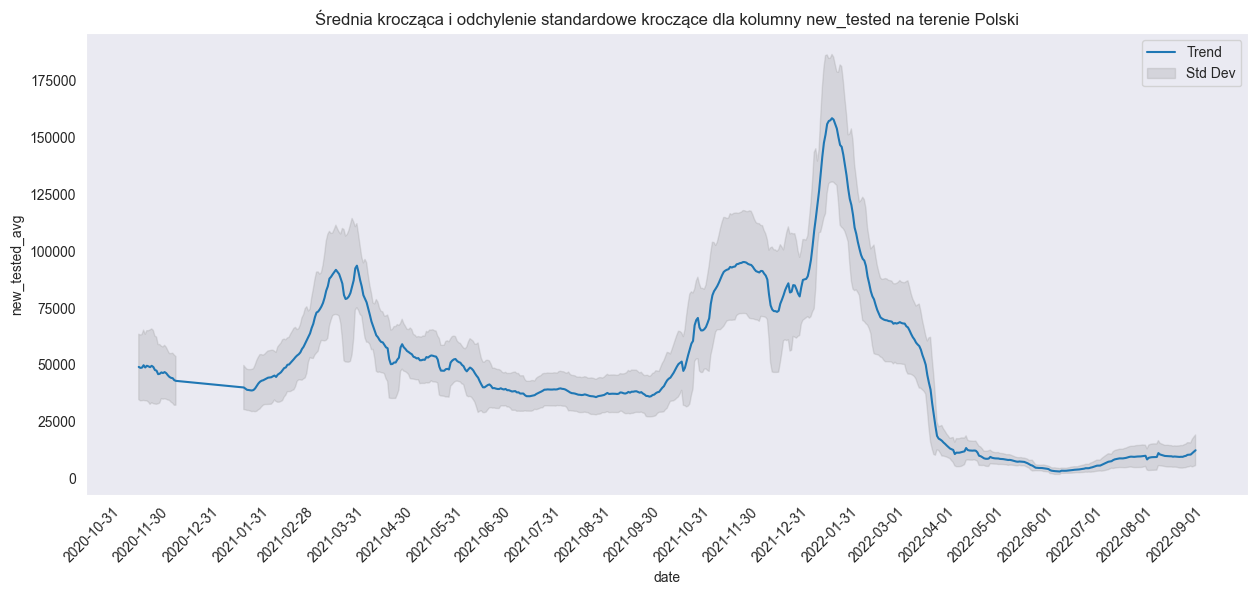

In [4]:
for column in research_columns:
    fig, ax = plt.subplots(figsize = (15,6))    
    fig = sns.lineplot(x ="date", y=column+'_avg', data=window_df, label='Trend')
    ax.fill_between(window_df['date'], 
                    window_df[column+'_avg'] - window_df[column+'_std'], 
                    window_df[column+'_avg'] + window_df[column+'_std'], 
                    color='gray', alpha=0.2, label='Std Dev')
    plt.title('Średnia krocząca i odchylenie standardowe kroczące dla kolumny ' + column + ' na terenie Polski')
    plt.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)
    plt.grid()

plt.show()

# Część 2
Misja dodatkowa - Szeregi czasowe

Analiza szeregów czasowych ma na celu zbadanie zjawiska na podstawie zachodzących zmian w czasie u mierzalnych wartości. Model buduje się w oparciu o część systematyczną, tj. trendy oraz wahania cykliczne i sezonowe. Ewentualne szumy i wahania przypadkowe nie są uwzględniane. 


Wykorzystaj do analizy trendów analizę szeregów czasowych (metoda średniej ruchomej czy inne modele autoregresyjne), która umożliwi zbadanie 5 przypadków rozważanych w części 1 poziomu

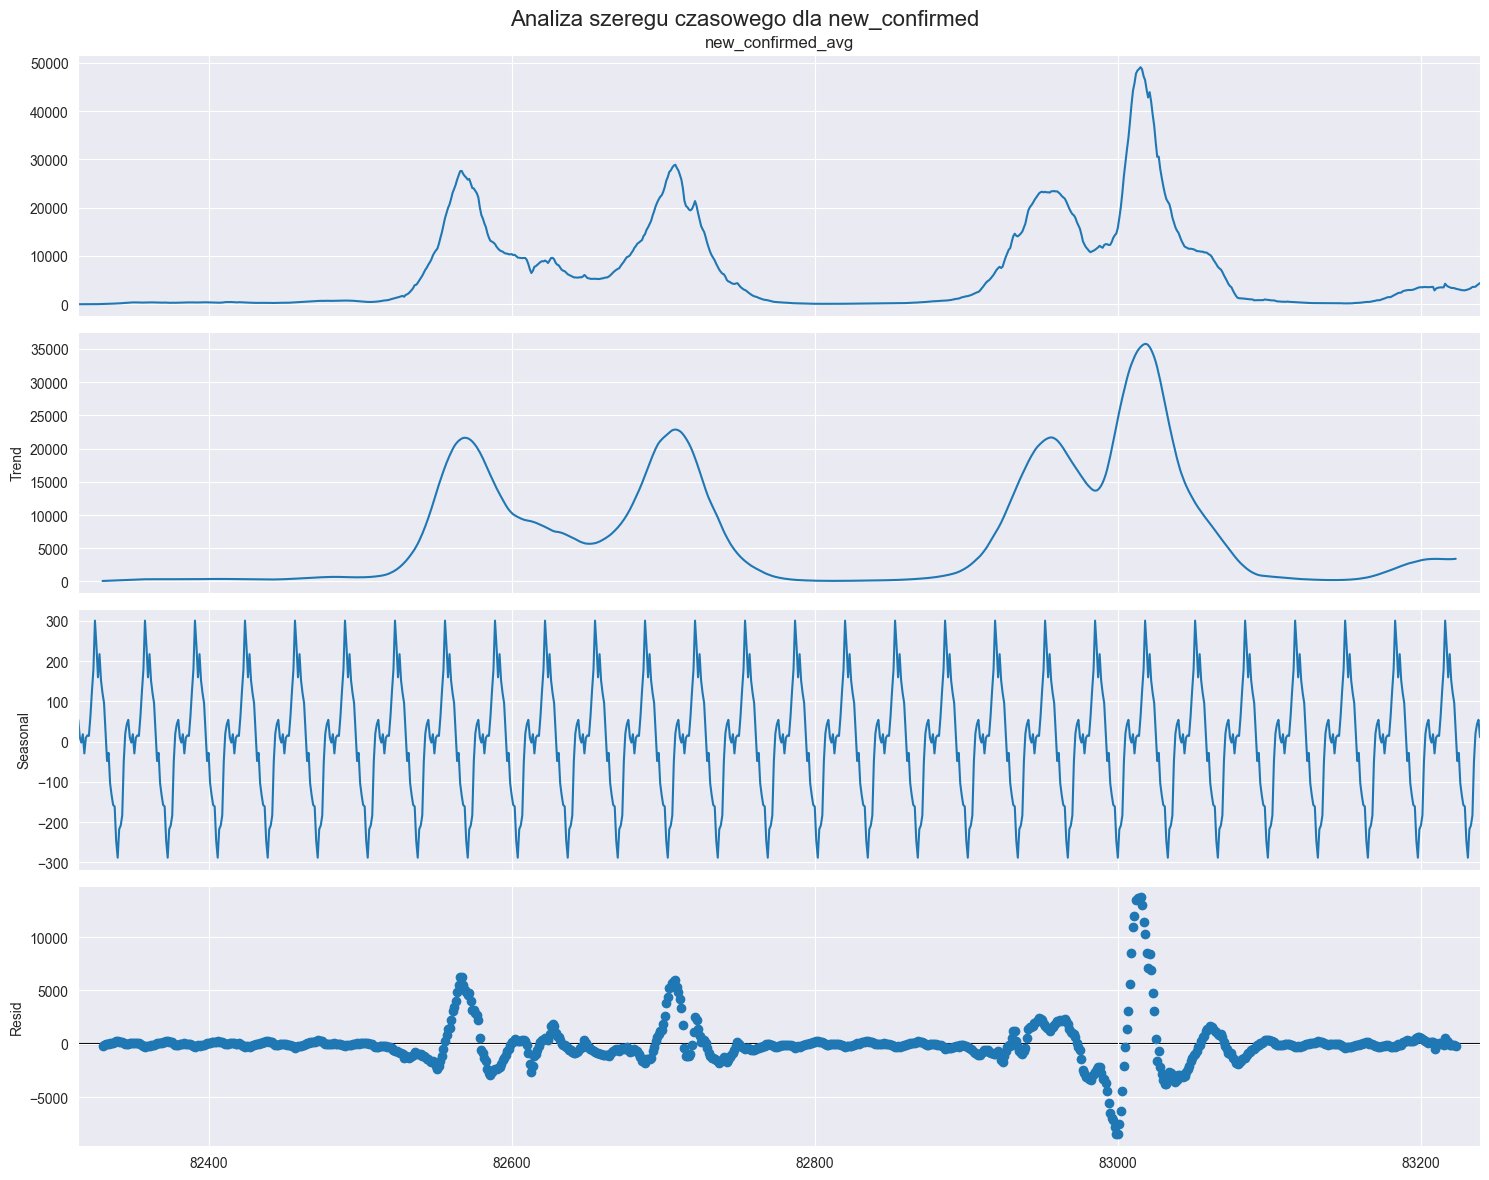

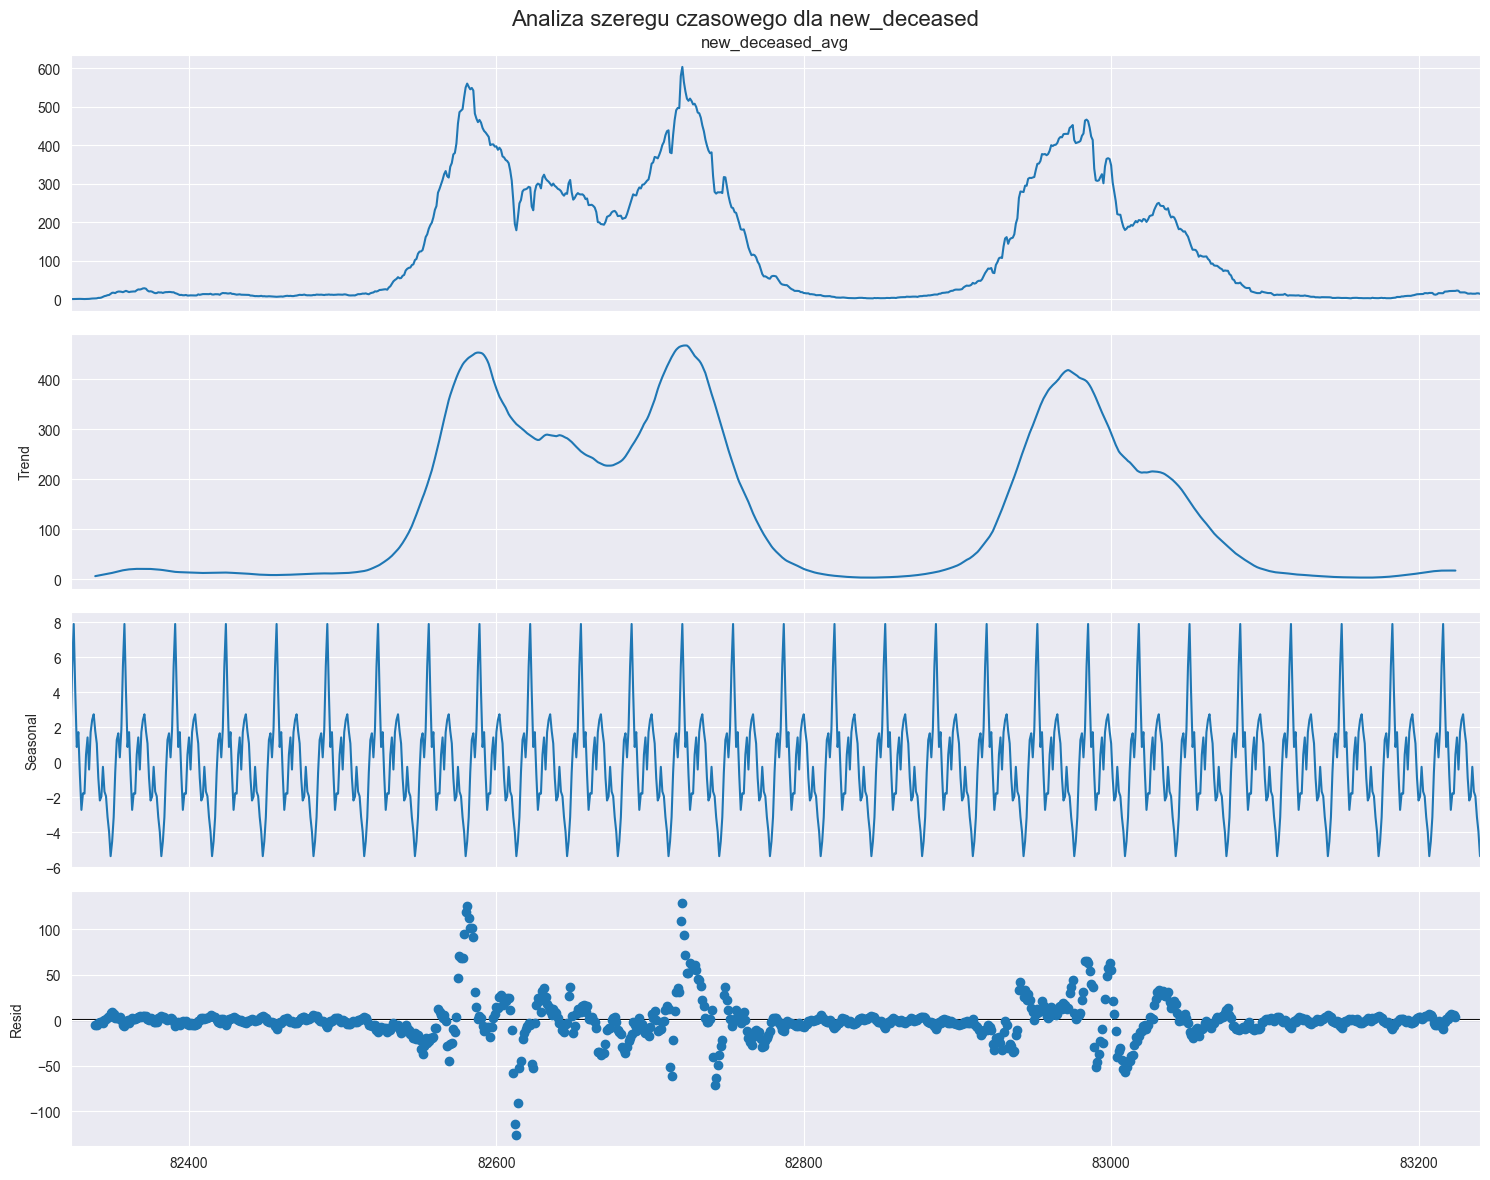

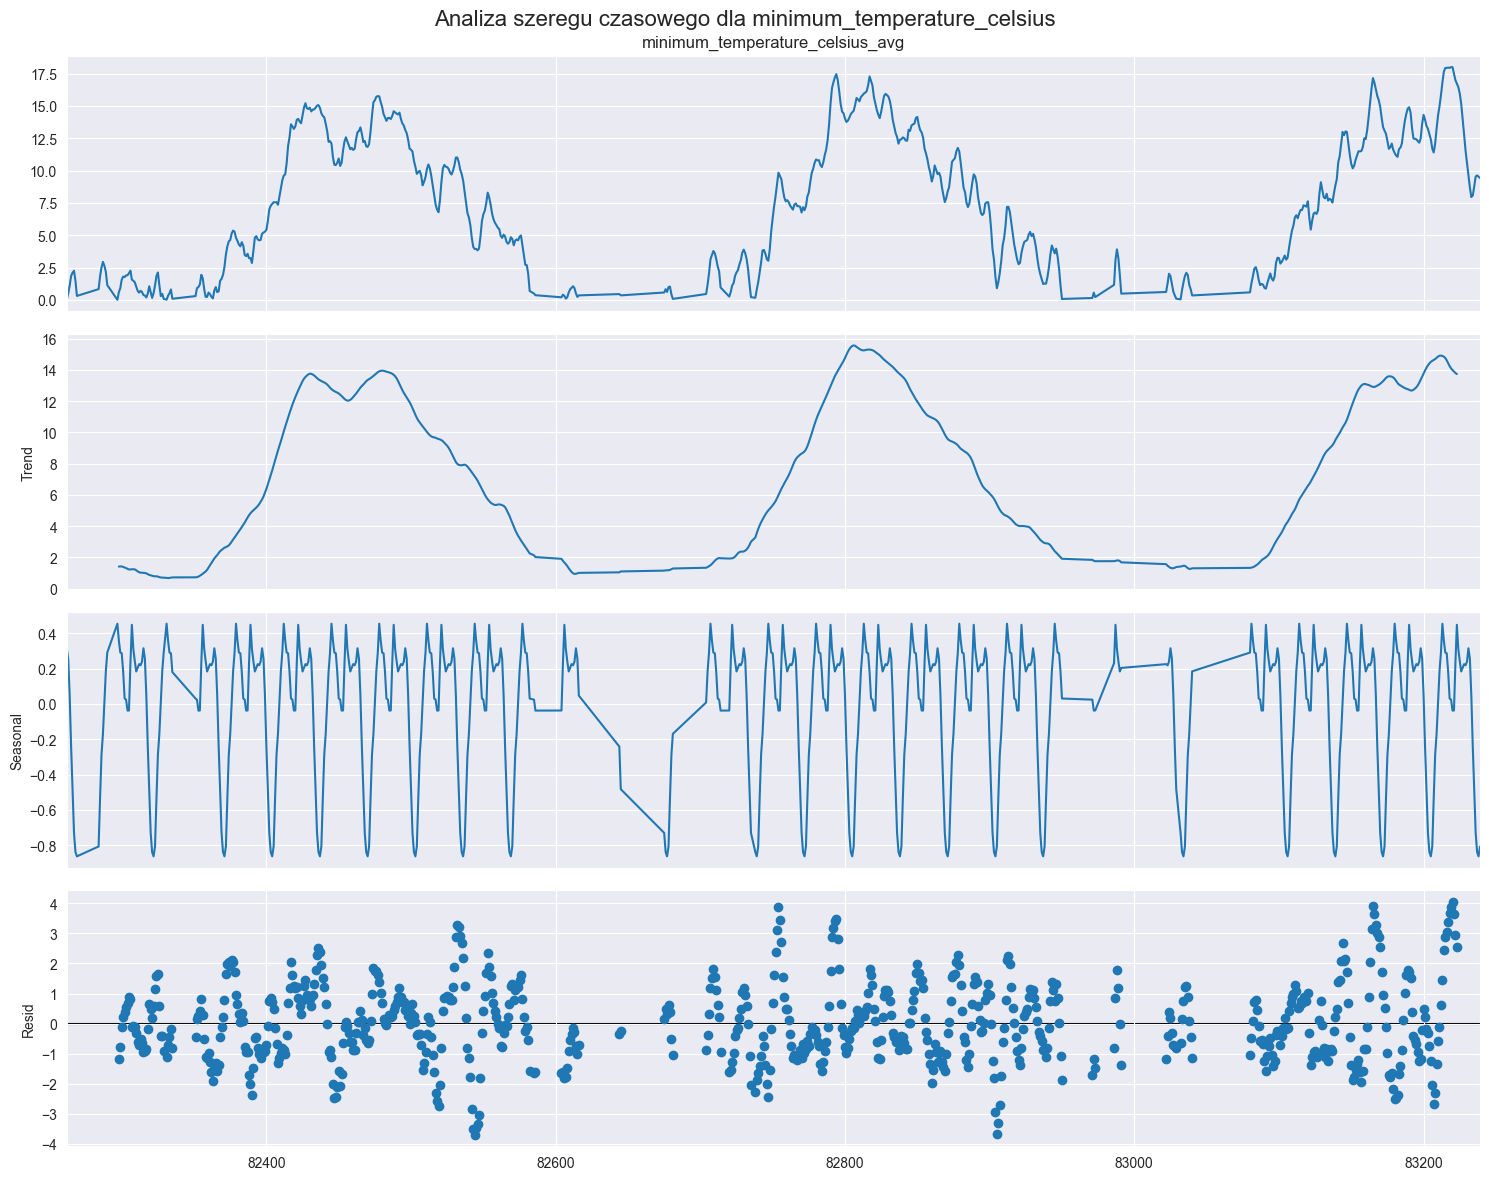

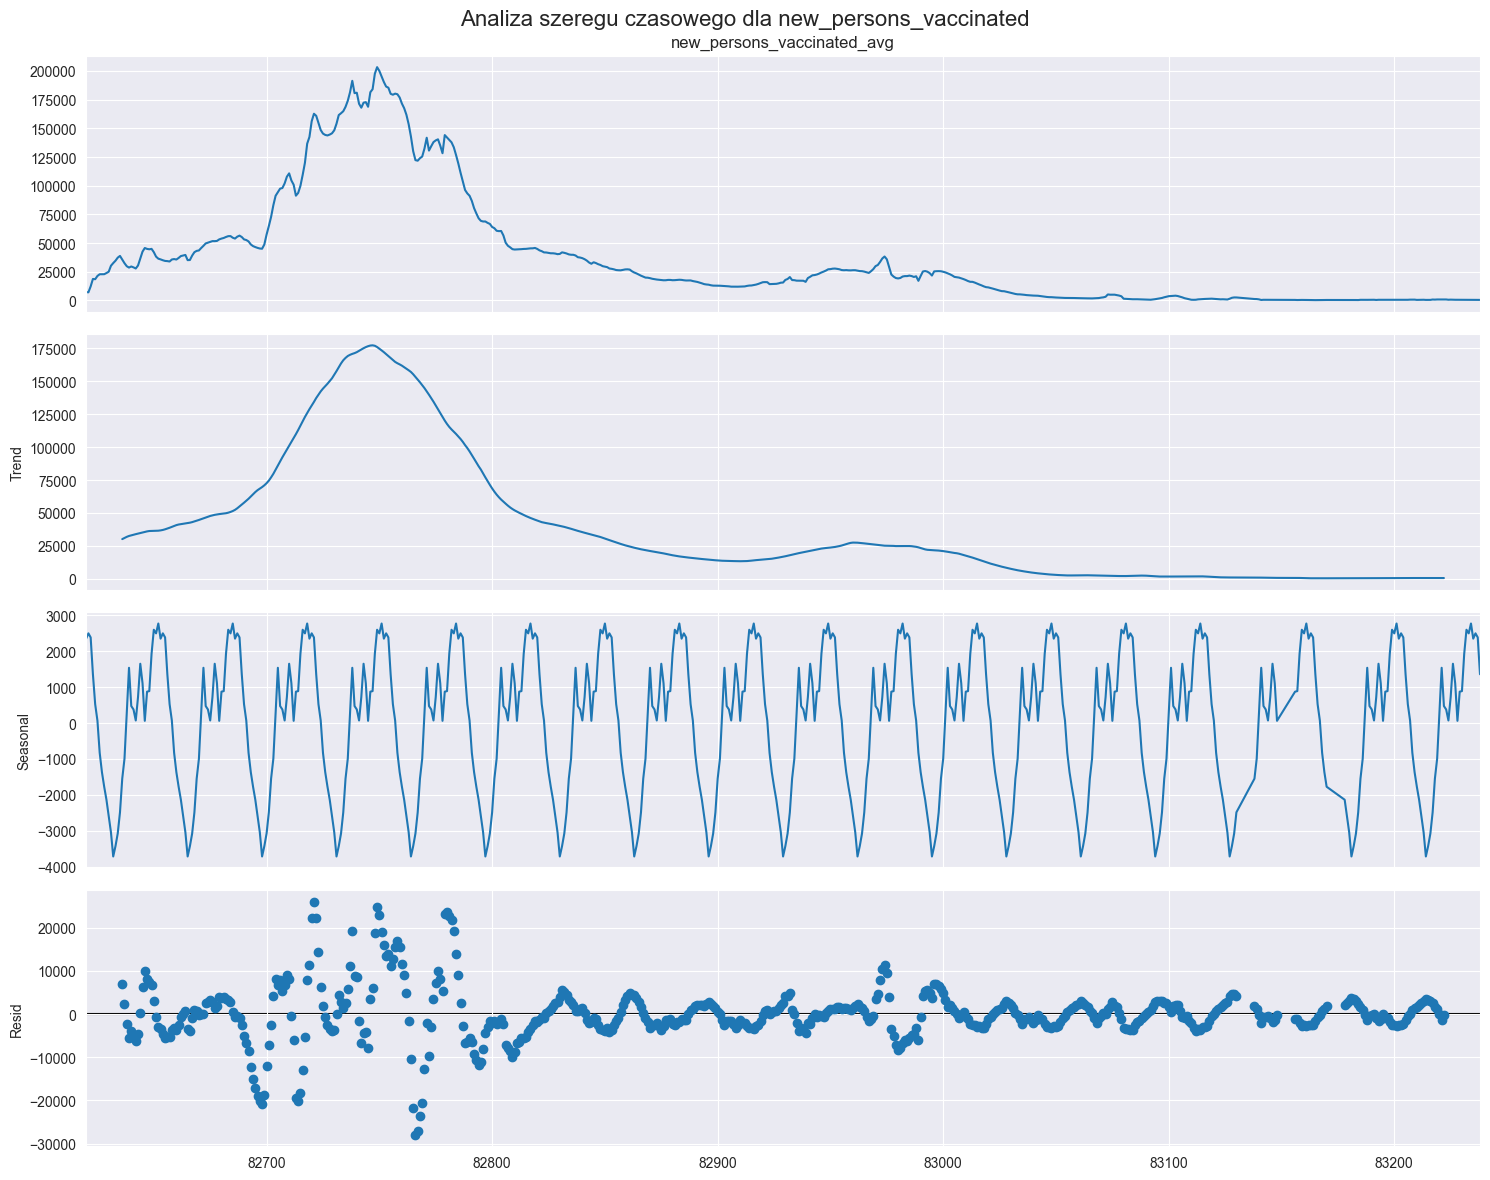

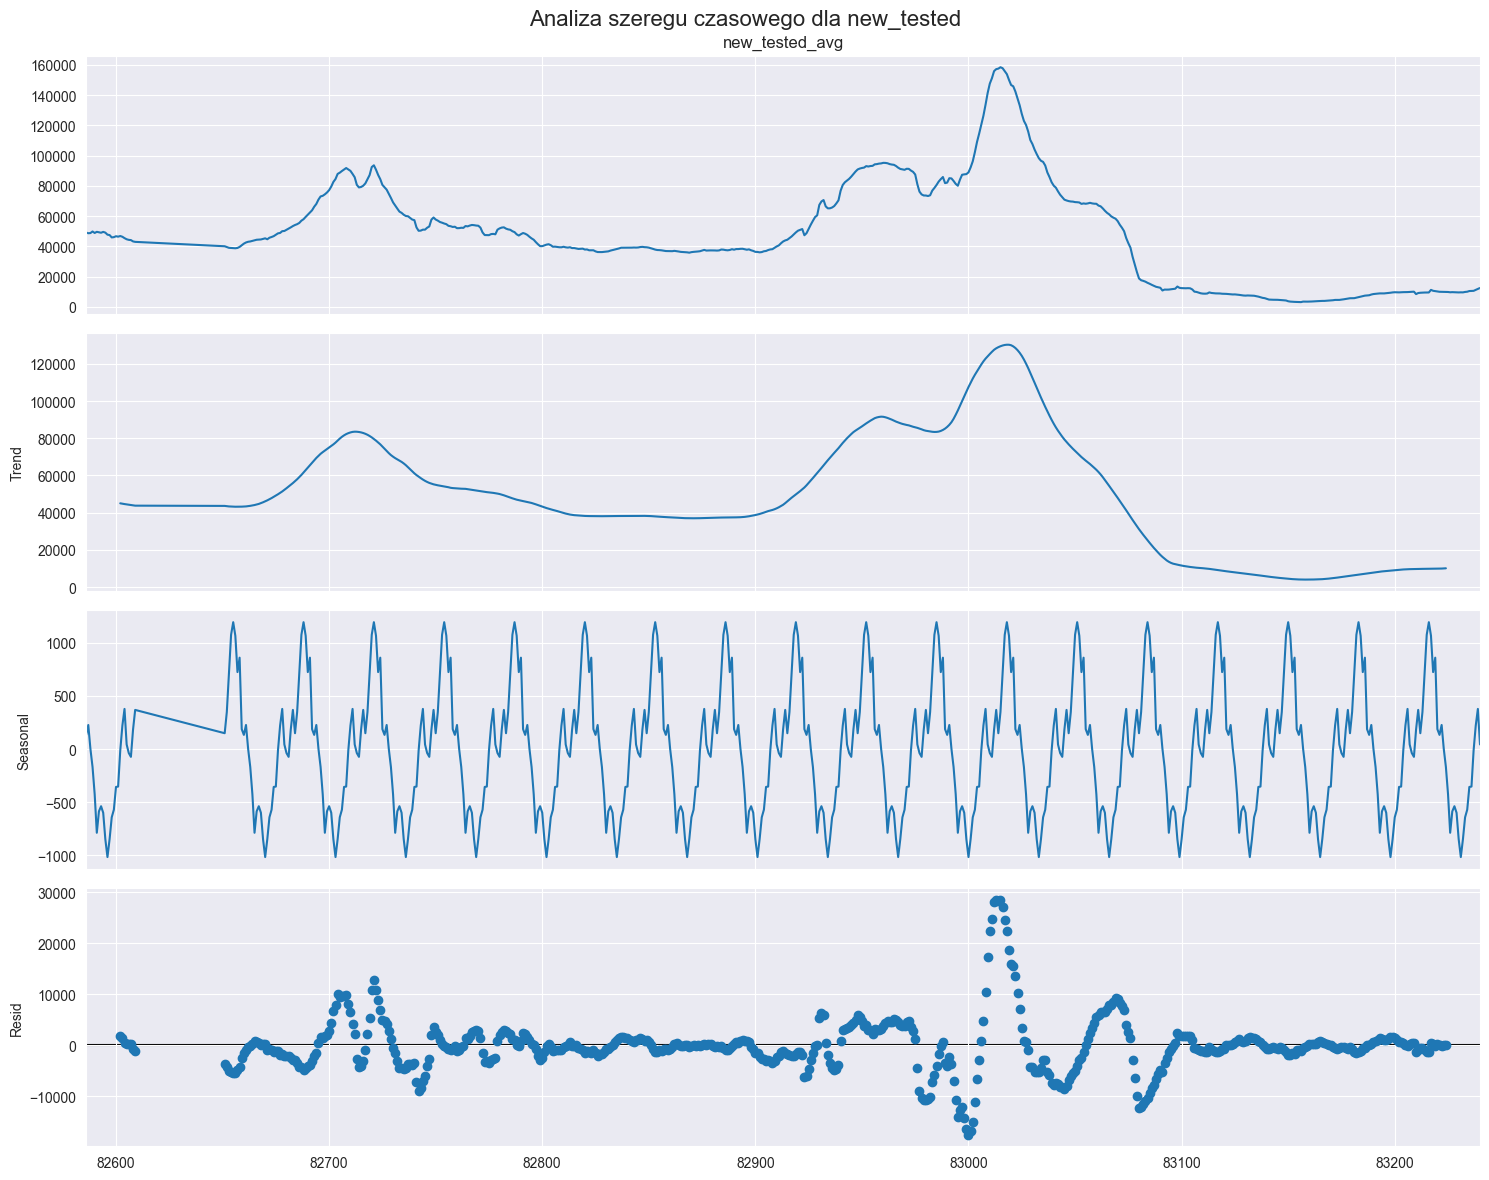

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = (15, 12)

for column in research_columns:
    multiplicative_decomposition = seasonal_decompose(window_df[column+'_avg'][window_df[column+'_avg'] > 0], model='additive', period=33)
    
    multiplicative_decomposition.plot().suptitle('Analiza szeregu czasowego dla '+column, fontsize=16)
    plt.tight_layout()

plt.show()

# Część 3:

Analiza regresji pozwala na przewidzenie nieznanych wartości na podstawie innych, które są znane. Jest to metoda statystyczna, która opisuje współzmienności kilku zmiennych przez dopasowanie do nich odpowiedniej funkcji. Model regresji liniowej zakłada liniową zależność między zmienną niezależną (np. czasem), a zmienną zależną (np. liczbą nowych zachorowań).

Przygotuj dane treningowe w interesującym Cię okresie czasu (np. druga połowa 2020 roku i pierwsza połowa 2021 roku, tj. 52 tygodnie = X) oraz ewentualne dane testowe. Możesz przefiltrować dane także po innych kryteriach, jeżeli uznasz to za potrzebne. Zastosuj analizę regresji, aby przewidzieć wartości w kolejnych X tygodniach następujących po wybranym okresie treningowym. Użyj modelu regresji liniowej, gdzie zmienną niezależną będzie czas, a zmienną zależną:

In [6]:
research_columns_avg = [col+'_avg' for col in research_columns]
df3 = window_df[research_columns_avg]

df3['date'] = pd.to_datetime(window_df['date'])

start_date = '2020-12-31'
end_date = '2021-12-31'
train_data = df3[(df3['date'] >= start_date) & (df3['date'] <= end_date)]

for column in research_columns_avg:
    X_train = train_data['date'][train_data[column].notnull()].apply(lambda x: (x - pd.Timestamp(start_date)).days).values.reshape(-1, 1)
    y_train = train_data[column][train_data[column].notnull()].values
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    end_date_training = pd.Timestamp(end_date)
    end_date_test = '2022-09-17'
    X_test = pd.date_range(start=end_date_training, end=end_date_test, freq='D')
    X_test_numeric = X_test.to_series().apply(lambda x: (x - pd.Timestamp(start_date)).days).values.reshape(-1, 1)
    y_pred = model.predict(X_test_numeric)
    
    predicted_data = pd.DataFrame({
    'date': X_test,
    column+'_pred': y_pred
    })
    predicted_data['date'] = predicted_data['date'].astype(str)
    window_df = pd.merge(window_df, predicted_data, on='date', how='outer')

display(window_df)

C:\Users\szlas\AppData\Local\Temp\ipykernel_14680\3815889074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(window_df['date'])


,date,new_confirmed_avg,new_deceased_avg,new_persons_vaccinated_avg,new_tested_avg,minimum_temperature_celsius_avg,new_confirmed_std,new_deceased_std,new_persons_vaccinated_std,new_tested_std,minimum_temperature_celsius_std,new_confirmed_avg_pred,new_deceased_avg_pred,minimum_temperature_celsius_avg_pred,new_persons_vaccinated_avg_pred,new_tested_avg_pred
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2022-09-13,4383.0,15.000000,NaN,11926.285714,9.423016,2755.807686,11.195237,NaN,6428.569818,2.80971,8432.571497,3.324887,11.868407,-25374.180912,66675.263095
987,2022-09-14,NaN,13.857143,NaN,12539.857143,NaN,NaN,10.383137,NaN,6717.006536,NaN,8434.275742,2.906848,11.885136,-25567.855295,66702.191974
988,2022-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8435.979986,2.488809,11.901865,-25761.529677,66729.120852
989,2022-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8437.684230,2.070770,11.918595,-25955.204060,66756.049731


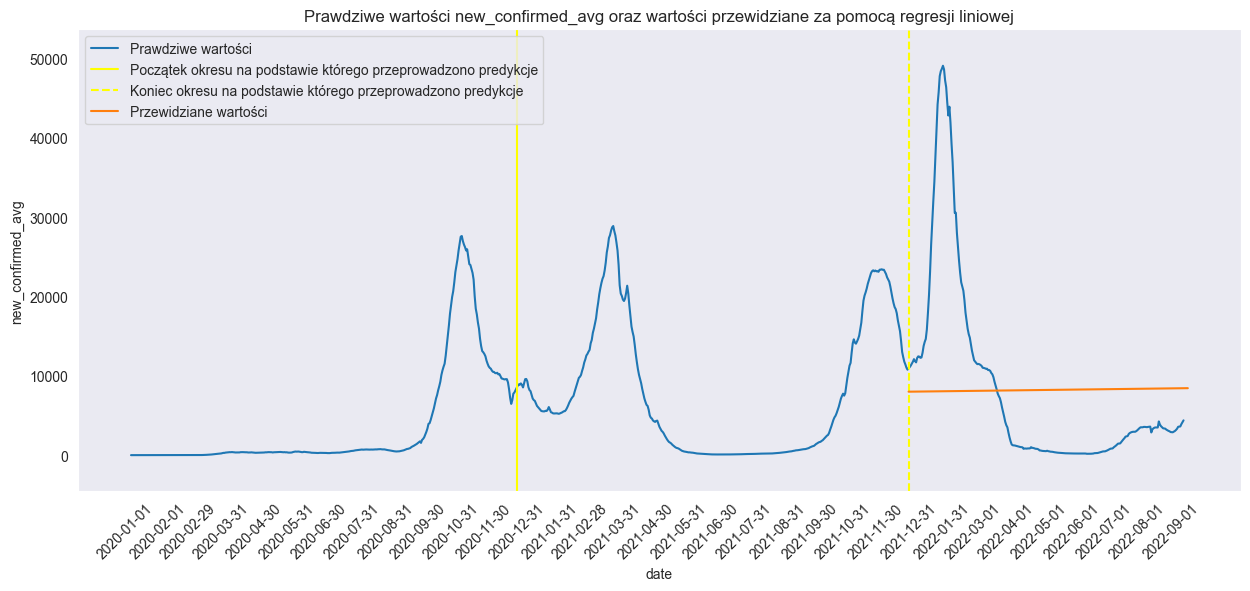

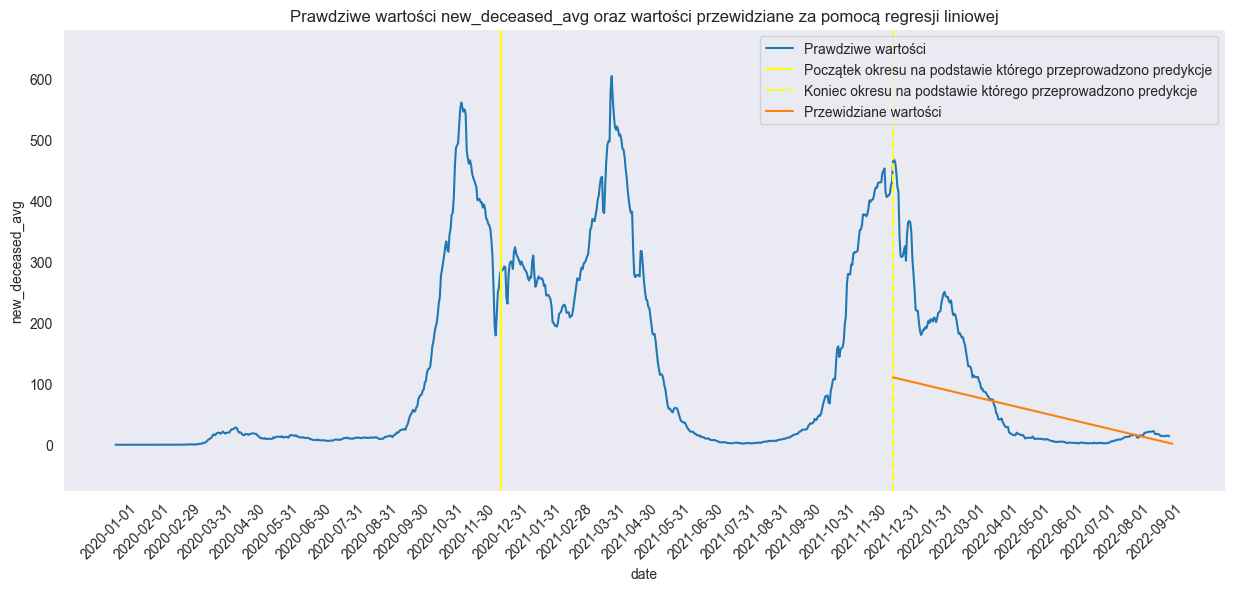

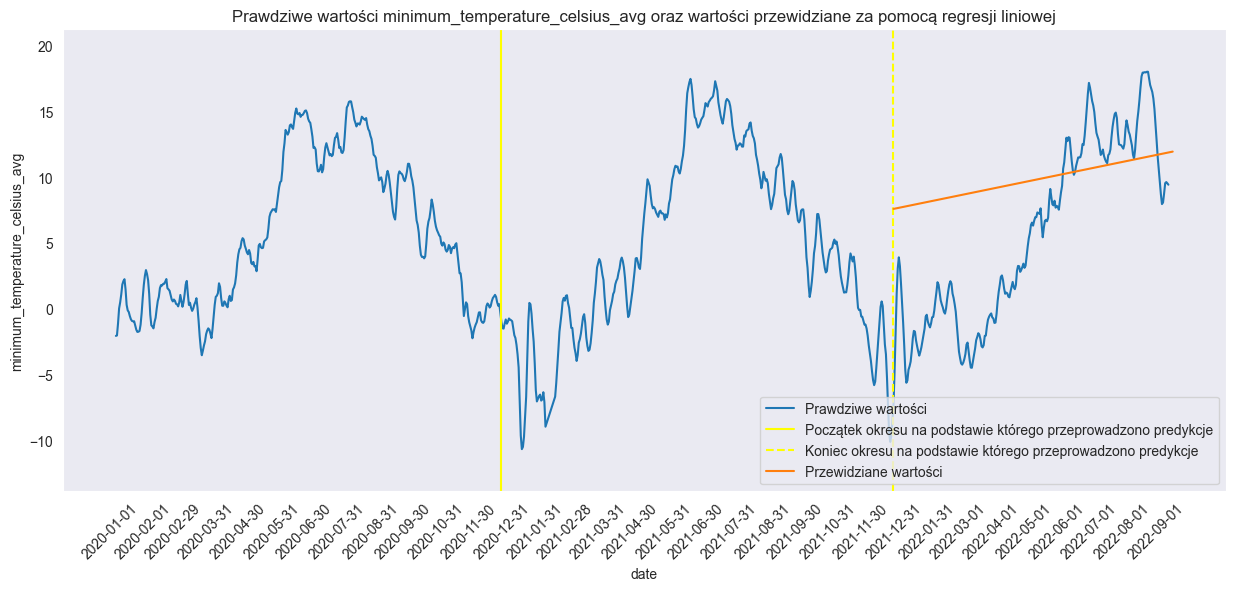

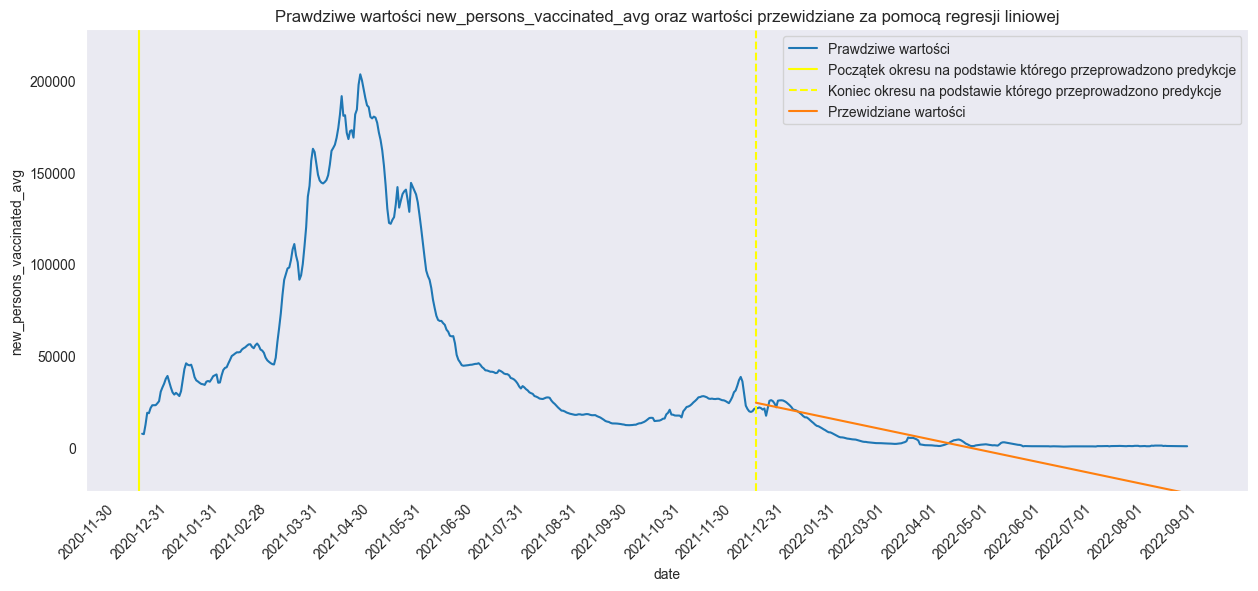

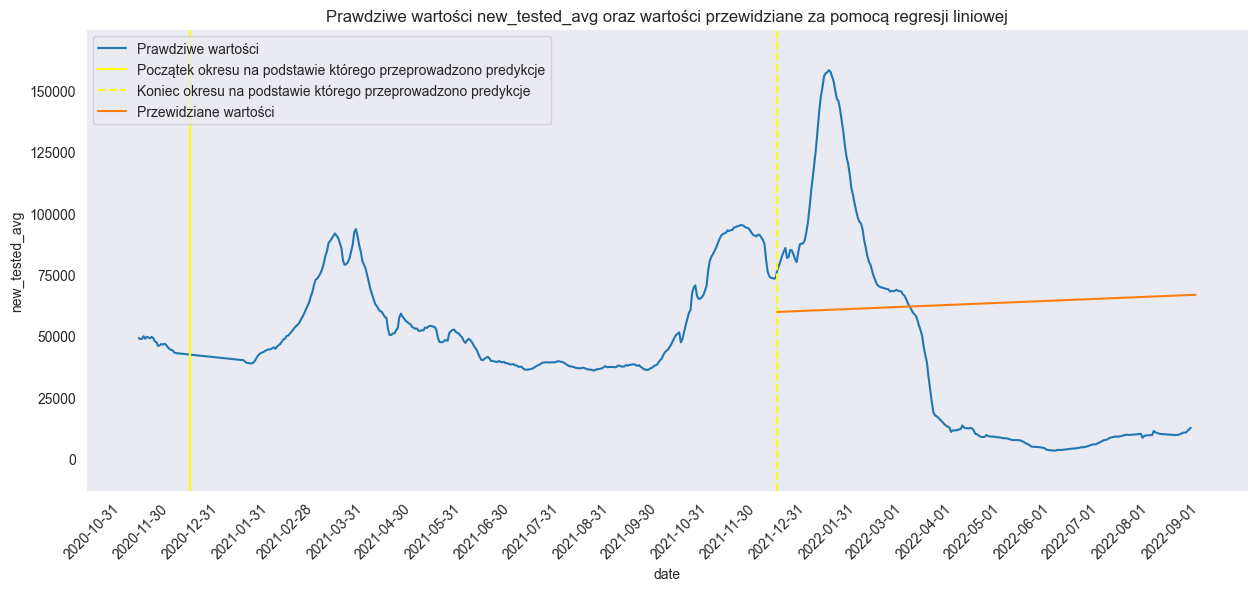

In [7]:
for column in research_columns_avg:
    fig, ax = plt.subplots(figsize = (15,6))    
    sns.lineplot(x ="date", y=column, data=window_df, label='Prawdziwe wartości')
    ax.axvline(start_date,  c = 'yellow', label = 'Początek okresu na podstawie którego przeprowadzono predykcje')
    ax.axvline(end_date,  c = 'yellow', label = 'Koniec okresu na podstawie którego przeprowadzono predykcje', linestyle='--')
    sns.lineplot(x ="date", y=column+'_pred', data=window_df, label='Przewidziane wartości')
    plt.title('Prawdziwe wartości ' + column + ' oraz wartości przewidziane za pomocą regresji liniowej')
    plt.ylim((window_df[column].min() - 0.5 * window_df[column].std(), window_df[column].max() + 0.5 * window_df[column].std()))
    plt.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)
    plt.grid()

plt.show()

# Część 4
Misja dodatkowa - Regresja wielomianowa

W regresji wielomianowej zastosowanie wielomianów wyższych stopni pozwala na uwzględnienie nieliniowych związków między zmiennymi niezależnymi (np. czasem) a zmienną zależną (np. liczbą nowych zachorowań). Aby dobrać odpowiedni stopień wielomianu, można przeprowadzić walidację krzyżową lub podzielić dane na zbiory treningowe i testowe, a następnie obliczyć metryki błędów dla różnych stopni wielomianów. 

Stopień zgodności modelu z danymi można określić na podstawie miar dopasowania, np. odchylenia standardowego reszt, wariancji reszt, współczynnika zmienności losowej czy współczynnika determinacji.


Użyj model regresji wielomianowej dla wszystkich 5 przypadków rozważanych w części 3 poziomu 3. Oceń, który model regresji (liniowy czy wielomianowy) okazał się "lepszy" dla każdego przypadku. W tym celu możesz użyć dowolnej miary dopasowania modelu. Uzasadnij swoje zdanie.

In [8]:
df4 = window_df[research_columns_avg]

df4['date'] = pd.to_datetime(window_df['date'])

start_date = '2020-12-31'
end_date = '2021-12-31'
train_data = df4[(df4['date'] >= start_date) & (df4['date'] <= end_date)]

for column in research_columns_avg:
    X_train = train_data['date'][train_data[column].notnull()].apply(lambda x: (x - pd.Timestamp(start_date)).days).values.reshape(-1, 1)
    y_train = train_data[column][train_data[column].notnull()].values
    for i in range(2, 6):
        poly = PolynomialFeatures(degree=i)
        X_train_poly = poly.fit_transform(X_train)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        end_date_training = pd.Timestamp(end_date)
        end_date_test = '2022-09-17'
        X_test = pd.date_range(start=end_date_training, end=end_date_test, freq='D')
        X_test = pd.to_datetime(X_test.date)  
        X_test_days = (X_test - pd.Timestamp(start_date)).days.values.reshape(-1, 1)
        X_test_poly = poly.transform(X_test_days)
        y_pred = model.predict(X_test_poly)
        
        predicted_data = pd.DataFrame({
        'date': X_test,
        column+'_poly_pred_'+str(i): y_pred
        })
        predicted_data['date'] = predicted_data['date'].astype(str)
        window_df = pd.merge(window_df, predicted_data, on='date', how='outer')

display(window_df)

C:\Users\szlas\AppData\Local\Temp\ipykernel_14680\511839640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['date'] = pd.to_datetime(window_df['date'])


,date,new_confirmed_avg,new_deceased_avg,new_persons_vaccinated_avg,new_tested_avg,minimum_temperature_celsius_avg,new_confirmed_std,new_deceased_std,new_persons_vaccinated_std,new_tested_std,...,minimum_temperature_celsius_avg_poly_pred_4,minimum_temperature_celsius_avg_poly_pred_5,new_persons_vaccinated_avg_poly_pred_2,new_persons_vaccinated_avg_poly_pred_3,new_persons_vaccinated_avg_poly_pred_4,new_persons_vaccinated_avg_poly_pred_5,new_tested_avg_poly_pred_2,new_tested_avg_poly_pred_3,new_tested_avg_poly_pred_4,new_tested_avg_poly_pred_5
0,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2022-09-13,4383.0,15.000000,NaN,11926.285714,9.423016,2755.807686,11.195237,NaN,6428.569818,...,393.159417,295.862369,-472407.607785,1.953392e+06,4.438759e+06,-3.012002e+07,279239.139995,1.422104e+06,-1.605016e+06,-4.763501e+06
987,2022-09-14,NaN,13.857143,NaN,12539.857143,NaN,NaN,10.383137,NaN,6717.006536,...,397.912589,299.400944,-474772.442215,1.968989e+06,4.479072e+06,-3.051127e+07,280329.874429,1.431899e+06,-1.626164e+06,-4.825176e+06
988,2022-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,402.705562,302.967489,-477142.233632,1.984665e+06,4.519645e+06,-3.090647e+07,281423.126746,1.441739e+06,-1.647498e+06,-4.887444e+06
989,2022-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,407.538542,306.562124,-479516.982034,2.000422e+06,4.560477e+06,-3.130564e+07,282518.896946,1.451624e+06,-1.669019e+06,-4.950308e+06


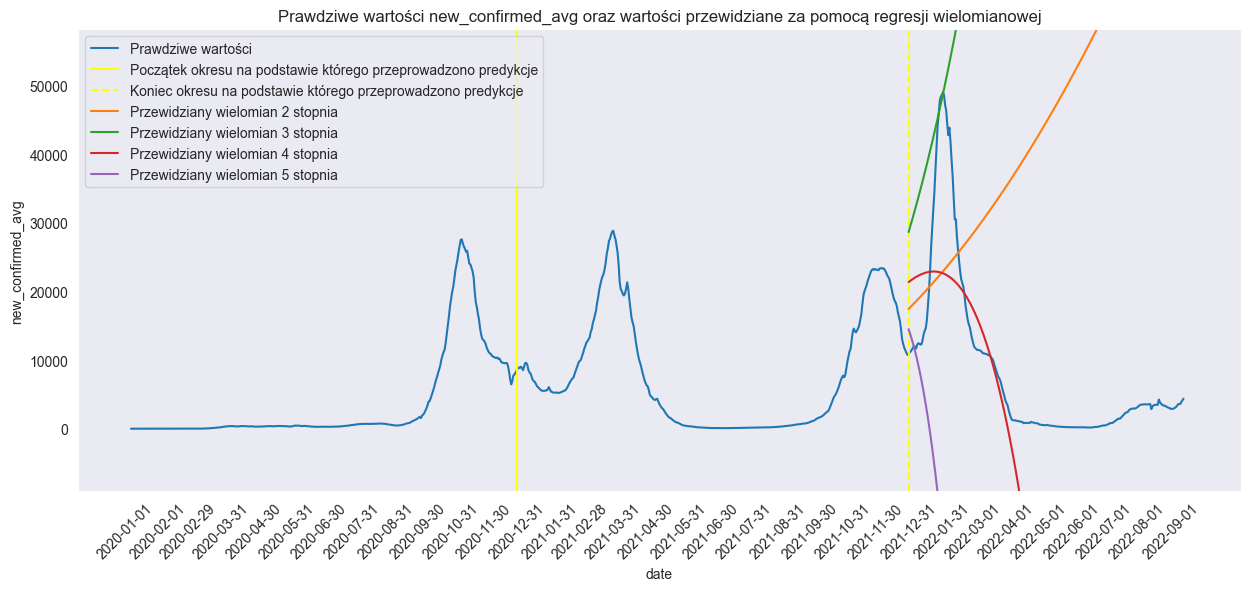

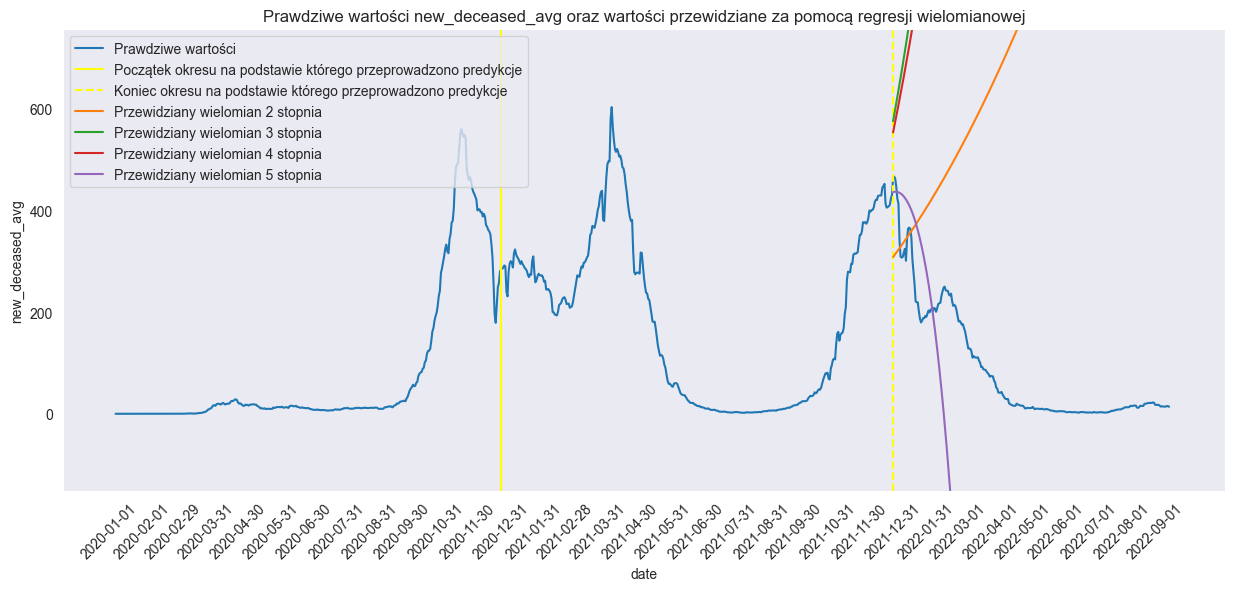

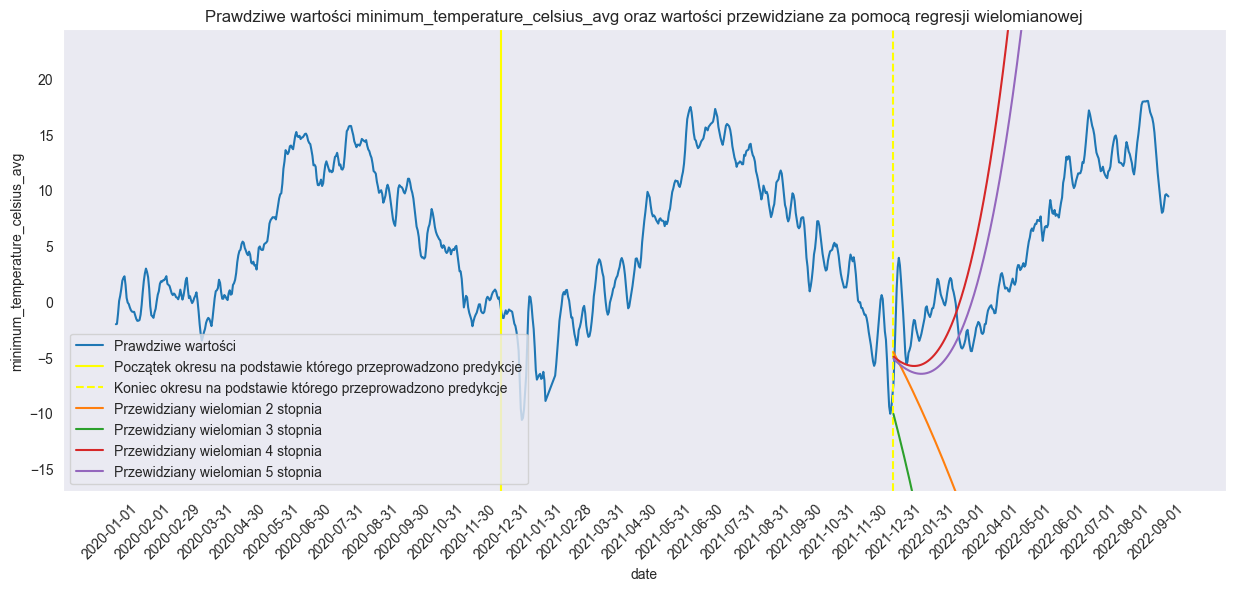

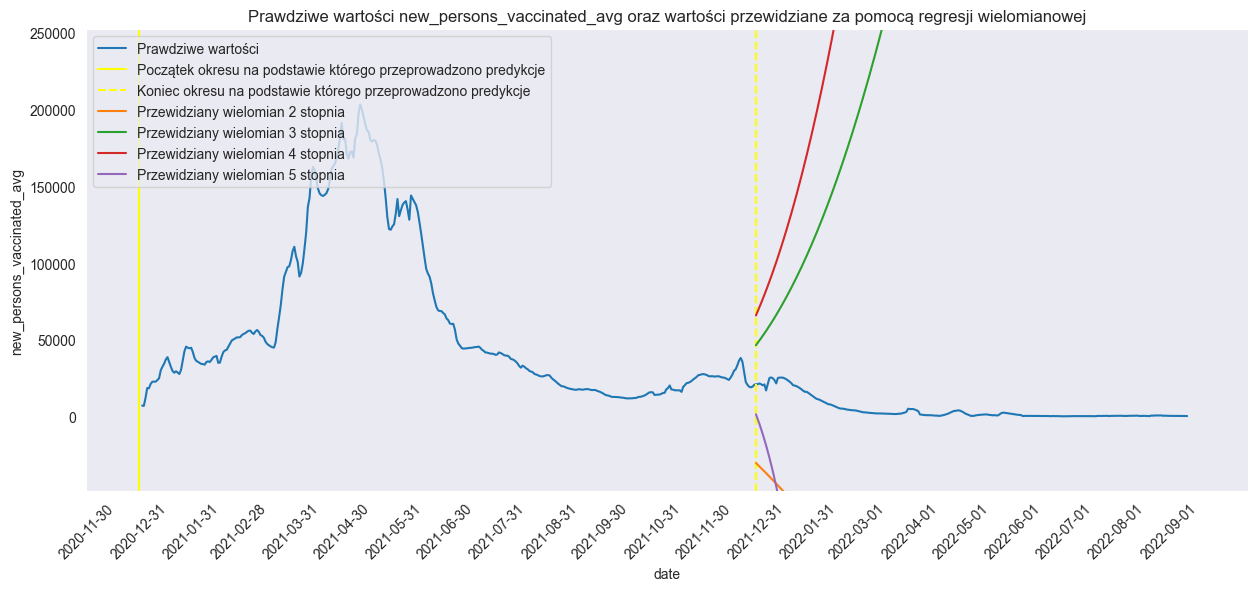

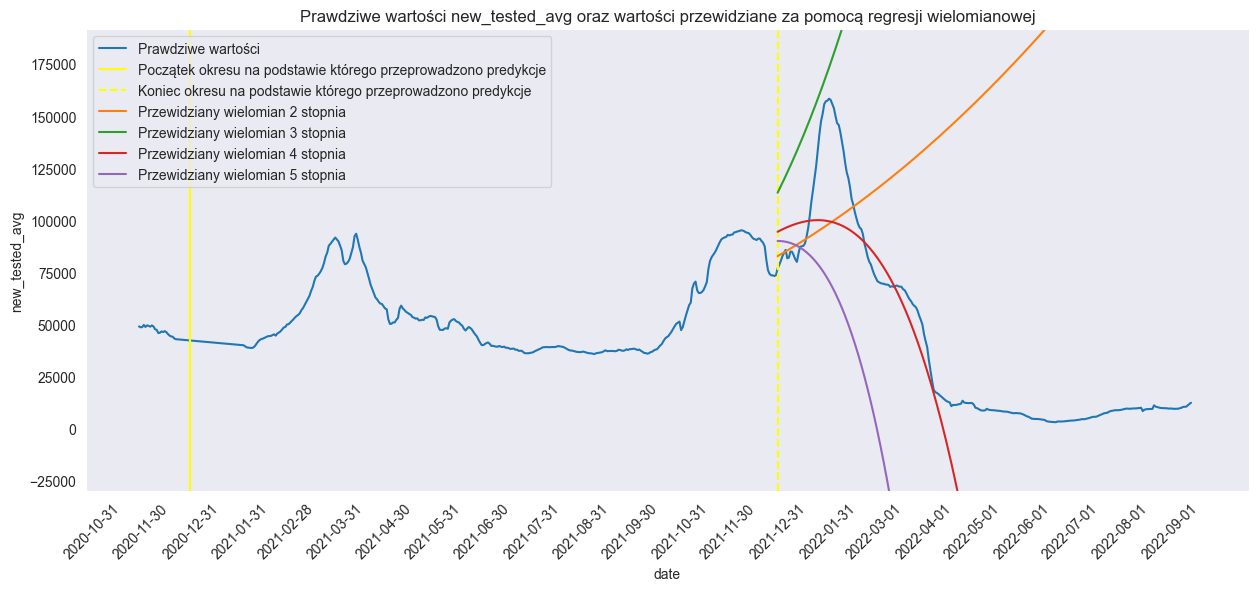

In [9]:
for column in research_columns_avg:
    fig, ax = plt.subplots(figsize = (15,6))    
    sns.lineplot(x ="date", y=column, data=window_df, label='Prawdziwe wartości')
    ax.axvline(start_date,  c = 'yellow', label = 'Początek okresu na podstawie którego przeprowadzono predykcje')
    ax.axvline(end_date,  c = 'yellow', label = 'Koniec okresu na podstawie którego przeprowadzono predykcje', linestyle='--')
    for i in range(2, 6):
        sns.lineplot(x ="date", y=column+'_poly_pred_'+str(i), data=window_df, label='Przewidziany wielomian '+str(i)+' stopnia')
    plt.title('Prawdziwe wartości ' + column + ' oraz wartości przewidziane za pomocą regresji wielomianowej')
    plt.ylim((window_df[column].min() - window_df[column].std(), window_df[column].max() + window_df[column].std()))
    plt.legend()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)
    plt.grid()

plt.show()

## Weryfikacja

Patrząc na powyższe wykresy na pierwszy rzut oka można stwierdzić że patrząc na cały okres czasu najbliższym przybliżeniem będzie funkcja liniowa patrząc pod kątem dobrze znanych metryk.

Warto natomiast zauważyć, że na prawie każdym z wykresów (pomijając dane o szczepieniach) z części 4 możemy odnotować jeden wykres wielomianu który na jakimś odcinku wykresu dobrze oddaje wygląd prawdziwych danych.

Poniżej obliczyliśmy błąd średniokwadratowy, nie jest on policzony w pełni poprawnie ze względu na dane brakujące, więć nie wszystkie przewidzane punktu zostały uwzględnione.

In [10]:
li = [l for l in window_df.columns.tolist() if 'avg' in l and 'pred' not in l]

calc_df = window_df.iloc[730:]
mse_df = pd.DataFrame()

for col in li:
    li2 = [l for l in window_df.columns.tolist() if col in l and l != col]
    mse_list = []
    for l in li2:
        mse = mean_squared_error(calc_df[col][calc_df[col].notnull()], calc_df[l][calc_df[col].notnull()])
        mse_list.append(mse)
    mse_df[col] = mse_list

In [11]:
idx = ['linear', 'poly1', 'poly2', 'poly3', 'poly4']
mse_df.index = idx
def format_value(value):
    return f'{value:.2f}'

mse_df = mse_df.applymap(format_value)
display(mse_df)

C:\Users\szlas\AppData\Local\Temp\ipykernel_14680\4097770620.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mse_df = mse_df.applymap(format_value)


,new_confirmed_avg,new_deceased_avg,new_persons_vaccinated_avg,new_tested_avg,minimum_temperature_celsius_avg
linear,145975056.14,8683.90,134505226.02,2729986393.70,49.98
poly1,2329579976.37,846028.01,65564051262.84,25753872532.28,3051.05
poly2,45598018191.10,24063673.66,779193488436.19,482812466097.81,18865.65
poly3,32011741352.22,13974395.61,3660077377902.47,343717196532.27,19573.85
poly4,2390155128823.73,407484480.37,124988958635537.77,3159267923208.08,10654.53


Na bazie powyższej tabeli możemy stwierdzić, że najbliżsym przybliżeniem jest funkcja liniowa stworzona na bazie odpowiedniej kolumny, jednak dużo trafniej dane oddają wycinki przybliżeń utworzonych z pomocą regresji wielomianowej. Wynik regresji wielomianowej jest znacznie zaniżony ze względu na to w jaki sposób te funckje zbliżają się do +/- nieskończoności. W wyniku czego badanie całego okresu czasu z użyciem jakichkowiek metryk mija się z celem.